In [4]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
from matplotlib import rc
rc('text', usetex=False) 


# Bag plotting 

In next cell give the full path relative to this jupyter notebook script as a bag name. If bag is located in the same folder as this script, you can just add `bag_name.bag` as a bag namev variable. 

After defining bag_name variable you can call `bagreader` method upon it. It returns `bagreader` object which enables us to easily extract topics in the form of `csv_files`. 

### Example: 
```
bag_name = my_bag.bag 
b = bagreader(bag_name)
```

In [5]:
bag_name = 'h2ami_1plot.bag'
bag_name1 = "hpe_openpose1.bag"
bag_name2 = "hpe_sb1.bag"
bag_name3 = "hpe_uav.bag"
arm1 = "hpe_arm.bag"
arm2 = "hpe_arm2.bag"

b1 = bagreader(bag_name1)
b2 = bagreader(bag_name2)
b3 = bagreader(bag_name3)
a1 = bagreader(arm1)
a2 = bagreader(arm2)


[INFO]  Data folder hpe_openpose1 already exists. Not creating.
[INFO]  Data folder hpe_sb1 already exists. Not creating.
[INFO]  Data folder hpe_uav already exists. Not creating.
[INFO]  Data folder hpe_arm already exists. Not creating.
[INFO]  Data folder hpe_arm2 already exists. Not creating.


## Get topics 

On your `bagreader` `b` object call `get_topics` as follows: 

```
csv_files = get_topics(b)
``` 


Call `print csv_files` to see which topics are recorded. 

In [7]:
def get_topics(b):
    csv_files = []
    for topic in b.topics:
        #print(topic)
        data = b.message_by_topic(topic)
        csv_files.append(data)
    return csv_files

In [10]:
csv_files = get_topics(b1)

print(csv_files)

['hpe_openpose1/cart_left_arm.csv', 'hpe_openpose1/cart_right_arm.csv', 'hpe_openpose1/frame.csv', 'hpe_openpose1/left_arm.csv', 'hpe_openpose1/right_arm.csv', 'hpe_openpose1/upper_body_3d.csv']


## Extract each topic as Pandas Dataframe 


Call `pd.read_csv` method on the element of the `csv_files` which you want to extract. 

For extracting left_arm, call following: 

`left_arm = pd.read_csv(csv_files[3])` 

In [11]:
#cart_left_arm = pd.read_csv(csv_files[0])
#cart_right_arm = pd.read_csv(csv_files[1])
#left_arm = pd.read_csv(csv_files[3])
#frame = pd.read_csv(csv_files[2])
#licas_joint_states = pd.read_csv(csv_files[4])
#right_arm = pd.read_csv(csv_files[5])
pd_rea

print(left_arm)

['hpe_uav/frame.csv', 'hpe_uav/uav-pose.csv', 'hpe_uav/uav-pose_ref.csv', 'hpe_uav/uav-r.csv', 'hpe_uav/upper_body_3d.csv']
         Time         x         y         z
0      36.528  0.000000  0.000000  0.000000
1      36.569  0.000000  0.000000  0.000000
2      36.608  0.000000  0.000000  0.000000
3      36.647  0.000000  0.000000  0.000000
4      36.688  0.000000 -0.055546  0.000000
...       ...       ...       ...       ...
3641  182.175  0.164174 -0.059546  0.000000
3642  182.211  0.209046 -0.076546 -0.106999
3643  182.257  0.209046 -0.076546 -0.106999
3644  182.293  0.209046 -0.076546 -0.106999
3645  182.341  0.209046 -0.076546 -0.106999

[3646 rows x 4 columns]


## Plot ARMS

             Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    1.675627e+09           1         1675626587           939270973   
1    1.675627e+09           2         1675626588            44706106   
2    1.675627e+09           3         1675626588            97918033   
3    1.675627e+09           4         1675626588           158797025   
4    1.675627e+09           5         1675626588           312716960   
..            ...         ...                ...                 ...   
349  1.675627e+09         350         1675626627           438076019   
350  1.675627e+09         351         1675626627           526642084   
351  1.675627e+09         352         1675626627           661782979   
352  1.675627e+09         353         1675626627           774941921   
353  1.675627e+09         354         1675626627           956563949   

     header.frame_id  shoulder_pitch.data  shoulder_roll.data  \
0                NaN           -14.569620          -10.068500   
1    

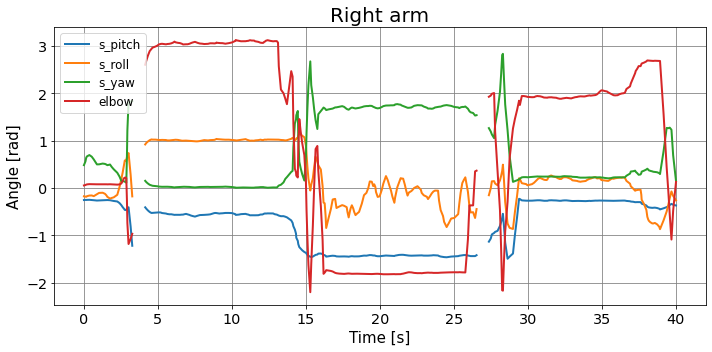

In [66]:

import numpy as np
print(left_arm)


def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time


def plot_arm(arm, savename, title="left_arm"): 
    
        
    w, h = 10, 5
    
    plt.figure(figsize=(w, h))
    
    scaled_t = scale_any_time(arm["Time"])
    s_pitch = arm["shoulder_pitch.data"]*np.pi/180
    s_roll = arm["shoulder_roll.data"]*np.pi/180
    s_yaw = arm["shoulder_yaw.data"]*np.pi/180
    e = arm["elbow.data"]*np.pi/180
    
    #jst = scale_any_time(jstates['Time'])
    #m_pitch = jstates['position_0']
    #m_roll = jstates['position_1']
    #m_yaw = jstates['position_2']
    #m_e = jstates['position_3']

    
    plt.plot(scaled_t, s_pitch, label="s_pitch", linewidth=2)
    #plt.plot(jst, m_pitch, label="m_pitch")
    plt.plot(scaled_t, s_roll, label="s_roll", linewidth=2)
    #plt.plot(jst, m_roll, label="m_roll")
    plt.plot(scaled_t, s_yaw, label="s_yaw", linewidth=2)
    #plt.plot(jst, m_yaw, label="m_yaw")
    plt.plot(scaled_t, e, label="elbow", linewidth=2)
    #plt.plot(jst, m_e, label="elbow")
    
    plt.grid(color="grey")
    plt.title("{}".format(title), fontsize=20)
    plt.xlabel("Time [s]", fontsize=15)
    plt.ylabel("Angle [rad]", fontsize=15)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.savefig(savename)
    
plot_arm(left_arm, "larm_test.svg", "Right arm")

#TODO: Compare and average everything in the code


## Plot 

         Time         x         y         z
0      36.528  0.000000  0.000000  0.000000
1      36.569  0.000000  0.000000  0.000000
2      36.608  0.000000  0.000000  0.000000
3      36.647  0.000000  0.000000  0.000000
4      36.688  0.000000 -0.055546  0.000000
...       ...       ...       ...       ...
3641  182.175  0.164174 -0.059546  0.000000
3642  182.211  0.209046 -0.076546 -0.106999
3643  182.257  0.209046 -0.076546 -0.106999
3644  182.293  0.209046 -0.076546 -0.106999
3645  182.341  0.209046 -0.076546 -0.106999

[3646 rows x 4 columns]
29025
3648


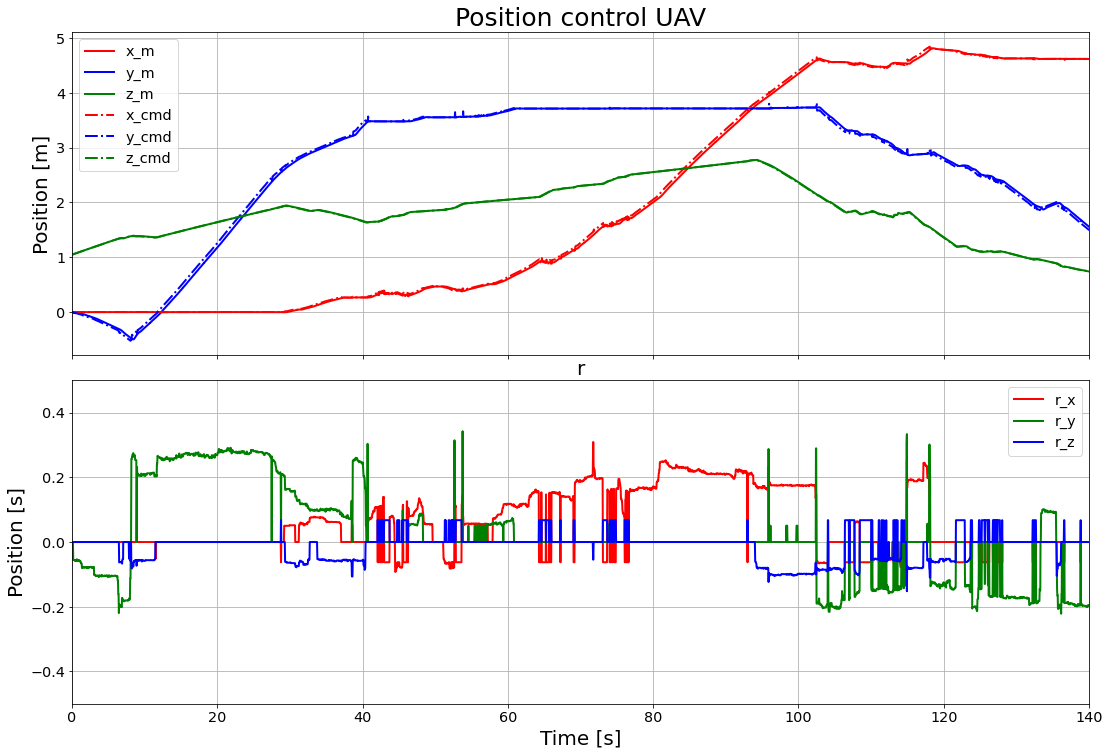

In [81]:
def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time

#print(uav_pose)
#print(uav_pose_ref)
print(r)

def plot_uav_position(uav_pose_ref, uav_pose, r, title): 
    
        
    
    t_uav = scale_any_time(uav_pose["Time"])
    t_uav_ref = scale_any_time(uav_pose_ref["Time"])
    
    
    print(len(t_uav))
    print(len(t_uav_ref))
    
    x = uav_pose['pose.position.x']
    y = uav_pose['pose.position.y']
    z = uav_pose['pose.position.z']
    x_r = uav_pose_ref['position.x']
    y_r = uav_pose_ref['position.y']
    z_r = uav_pose_ref['position.z']
    r_x = r['x']
    r_y = r['y']
    r_z = r['z']
    t_r = scale_any_time(r['Time'])
    
    #TODO: Add r_vector as a subplot
    #TODO: Scale and crop this part
    #TODO: Use crop DF method from the manipulator plotting 
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

    f.tight_layout()

    ax1.plot(t_uav, x, "r", label="x_m", linewidth=2)
    ax1.plot(t_uav, y, "b", label="y_m", linewidth=2)
    ax1.plot(t_uav, z, "g", label="z_m", linewidth=2)
    ax1.plot(t_uav_ref, x_r, "r-.", label="x_cmd", linewidth=2)
    ax1.plot(t_uav_ref, y_r, "b-.", label="y_cmd", linewidth=2)
    ax1.plot(t_uav_ref, z_r, "g-.", label="z_cmd", linewidth=2)
    ax1.grid(); ax1.set_title("Position control UAV", fontsize=25); ax1.set_xlim(0, 140)
    ax1.set_ylabel("Position [m]", fontsize=20); ax1.legend(); 
    ax2.plot(t_r, r_x, "r", label="r_x", linewidth=2)
    ax2.plot(t_r, r_y, "g", label="r_y", linewidth=2)
    ax2.plot(t_r, r_z, "b", label="r_z", linewidth=2)
    ax2.grid(); ax2.set_title("r", fontsize=20); 
    ax2.set_ylabel("Position [s]", fontsize=20); ax2.set_xlabel("Time [s]", fontsize=20); ax2.set_xlim(0, 140)
    ax2.set_ylim(-0.5, 0.5); ax2.legend();
    f.savefig("{}.svg".format(title))



plot_uav_position(uav_pose_ref, uav_pose, r, title="uav_position")




In [34]:
print(uav_pose)

          Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0       36.443        5072                 36           448000000   
1       36.450        5073                 36           453000000   
2       36.450        5074                 36           458000000   
3       36.460        5075                 36           463000000   
4       36.460        5076                 36           468000000   
...        ...         ...                ...                 ...   
29020  182.343       34251                182           343000000   
29021  182.349       34252                182           348000000   
29022  182.353       34253                182           353000000   
29023  182.358       34254                182           358000000   
29024  182.359       34255                182           363000000   

      header.frame_id  pose.position.x  pose.position.y  pose.position.z  \
0               world         0.000422         0.000225         1.048876   
1               wor

In [29]:
def plot_upper_body_detections(upper_body1, upper_body2, title): 
    
    
    ot = scale_any_time(upper_body1["Time"])
    st = scale_any_time(upper_body2["Time"])
    
    # 1
    olsx = upper_body1["left_shoulder.x"]
    olsy = upper_body1["left_shoulder.y"]
    olsz = upper_body1["left_shoulder.z"] 
    
    slsx = upper_body2["left_shoulder.x"]
    slsy = upper_body2["left_shoulder.y"]
    slsz = upper_body2["left_shoulder.z"]    
    
    #3
    orsx = upper_body1["right_shoulder.x"]
    orsy = upper_body1["right_shoulder.y"]
    orsz = upper_body1["right_shoulder.z"]
    
    srsx = upper_body2["right_shoulder.x"]
    srsy = upper_body2["right_shoulder.y"] 
    srsz = upper_body2["right_shoulder.z"]
    
    #4
    olex = upper_body1["left_elbow.x"]
    oley = upper_body1["left_elbow.y"]
    olez = upper_body1["left_elbow.z"]
    
    slex = upper_body2["left_elbow.x"]
    sley = upper_body2["left_elbow.y"]
    slez = upper_body2["left_elbow.z"]
    
    #5
    orex = upper_body1["right_elbow.x"]
    orey = upper_body1["right_elbow.y"]
    orez = upper_body1["right_elbow.z"]
    
    srex = upper_body2["right_elbow.x"]
    srey = upper_body2["right_elbow.y"]
    srez = upper_body2["right_elbow.z"]   
    
    #6
    orwx = upper_body1["right_wrist.x"]
    orwy = upper_body1["right_wrist.y"]
    orwz = upper_body1["right_wrist.z"]
    
    srwx = upper_body2["right_wrist.x"]
    srwy = upper_body2["right_wrist.y"]
    srwz = upper_body2["right_wrist.z"]  
    
    #7
    olwx = upper_body1["left_wrist.x"]
    olwy = upper_body1["left_wrist.y"]
    olwz = upper_body1["left_wrist.z"]
    
    slwx = upper_body2["left_wrist.x"]
    slwy = upper_body2["left_wrist.y"]
    slwz = upper_body2["left_wrist.z"]
    
    f, axs = plt.subplots(3, 2, sharey=True, figsize=(15, 15))
    # left shoulder
    axs[0][0].plot(ot, olsx, "r", label="xo")
    axs[0][0].plot(ot, olsy, "b",  label="yo")
    axs[0][0].plot(ot, olsz, "g",  label="zo")
    
    axs[0][0].plot(st, slsx, "m-.", label="xs")
    axs[0][0].plot(st, slsy, "c-.",  label="ys")
    axs[0][0].plot(st, slsz, "y-.",  label="zs")
    
    
    axs[0][0].axvspan(0, 15, alpha=0.1, color='red')
    axs[0][0].axvspan(15,30, alpha=0.1, color='green')
    axs[0][0].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[0][0].legend(loc="best")
    axs[0][0].grid(); axs[0][0].set_title("Left shoulder"); axs[0][0].set_xlabel("t [s]"); axs[0][0].set_ylabel("position [m]")
    
    # right shoulder
    axs[0][1].plot(ot, orsx, "r", label="xo")
    axs[0][1].plot(ot, orsy, "b", label="yo")
    axs[0][1].plot(ot, orsz, "g", label="zo")  
    
    axs[0][1].plot(st, slsx, "m-.", linewidth=2, label="xs")
    axs[0][1].plot(st, slsy, "c-.", linewidth=2, label="ys")
    axs[0][1].plot(st, slsz, "y-.", linewidth=2, label="zs")
    
    axs[0][1].axvspan(0, 15, alpha=0.1, color='red')
    axs[0][1].axvspan(15,30, alpha=0.1, color='green')
    axs[0][1].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[0][1].legend(loc="best")
    axs[0][1].grid(); axs[0][1].set_title("Right shoulder"); axs[0][1].set_xlabel("t [s]"); 
    
    # left elbow
    axs[1][0].plot(ot, olex, "r", label="xo")
    axs[1][0].plot(ot, oley, "b", label="yo")
    axs[1][0].plot(ot, olez, "g", label="zo")
    
    axs[1][0].plot(st, slex, "m-.", linewidth=2, label="xs")
    axs[1][0].plot(st, sley, "c-.", linewidth=2, label="ys")
    axs[1][0].plot(st, slez, "y-.", linewidth=2, label="zs")
    
    axs[1][0].axvspan(0, 15, alpha=0.1, color='red')
    axs[1][0].axvspan(15,30, alpha=0.1, color='green')
    axs[1][0].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[1][0].legend(loc="best")
    axs[1][0].grid(); axs[1][0].set_title("Left elbow"); axs[1][0].set_xlabel("t [s]"); axs[1][0].set_ylabel("position [m]")
    
    # right elbow
    axs[1][1].plot(ot, orex, "r", label="xo")
    axs[1][1].plot(ot, orey, "b", label="yo")
    axs[1][1].plot(ot, orez, "g", label="zo")
    
    axs[1][1].plot(st, srex, "m-.", linewidth=2, label="xs")
    axs[1][1].plot(st, srey, "c-.", linewidth=2, label="ys")
    axs[1][1].plot(st, srez, "y-.", linewidth=2, label="zs")
    
    axs[1][1].axvspan(0, 15, alpha=0.1, color='red')
    axs[1][1].axvspan(15,30, alpha=0.1, color='green')
    axs[1][1].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[1][1].legend(loc="best")
    axs[1][1].grid(); axs[1][1].set_title("Right elbow"); axs[1][1].set_xlabel("t [s]"); axs[1][1].set_ylabel("position [m]")
    
    # left wrist
    axs[2][0].plot(ot, olwx, "r", label="xo")
    axs[2][0].plot(ot, olwy, "b", label="yo")
    axs[2][0].plot(ot, olwz, "g", label="zo")
    
    axs[2][0].plot(st, slwx, "m-.", linewidth=2, label="xs")
    axs[2][0].plot(st, slwy, "c-.", linewidth=2, label="ys")
    axs[2][0].plot(st, slwz, "y-.", linewidth=2, label="zs")
    
    axs[2][0].axvspan(0, 15, alpha=0.1, color='red')
    axs[2][0].axvspan(15,30, alpha=0.1, color='green')
    axs[2][0].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[2][0].legend(loc="best")
    axs[2][0].grid(); axs[2][0].set_title("Left wrist"); axs[2][0].set_xlabel("t [s]"); axs[2][0].set_ylabel("position [m]")
    
    # right wrist
    axs[2][1].plot(ot, orwx, "r", label="xo")
    axs[2][1].plot(ot, orwy, "b", label="yo")
    axs[2][1].plot(ot, orwz, "g", label="zo")
    
    axs[2][1].plot(st, srwx, "m-.", linewidth=2, label="xs")
    axs[2][1].plot(st, srwy, "c-.", linewidth=2, label="ys")
    axs[2][1].plot(st, srwz, "y-.", linewidth=2, label="zs")
    
    axs[2][1].axvspan(0, 15, alpha=0.1, color='red')
    axs[2][1].axvspan(15,30, alpha=0.1, color='green')
    axs[2][1].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[2][1].legend(loc="best")    
    axs[2][1].grid(); axs[2][1].set_title("Right wrist"); axs[2][1].set_xlabel("t [s]"); axs[2][1].set_ylabel("position [m]")
   
    plt.tight_layout()
    plt.savefig(title)
    #ax1.plot(t, lsx)
    #ax1.plot(t, lsy)
    #ax1.plot(t, lsz)
    #ax2.plot

    
    
    
    

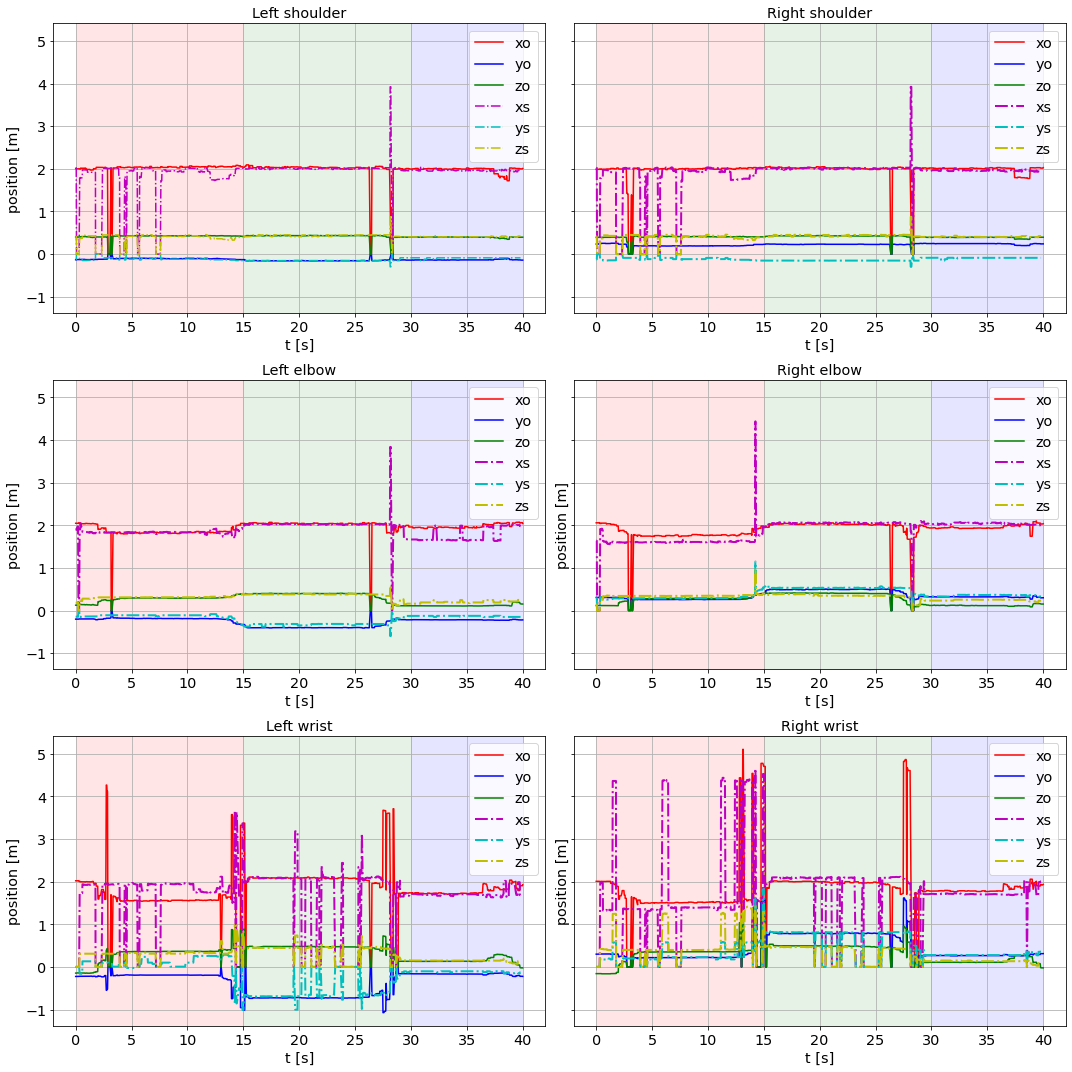

In [30]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plot_upper_body_detections(upper_body_op, upper_body_sb, "hpe_comparison.svg")